# IVYTS Proje - Machine Learning

Bu veri seti şu bağlantıdan indirebilirsiniz: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho? , ve kodu yerel olarak çalıştırmadan önce gerekli tüm paketleri yüklemelisiniz.

## Projenin Konu

Seçtiğimiz proje, yukarıda belirtilen veri setini kullanarak belirli verilerle araba fiyatlarını tahmin etmeye çalışan bir makine öğrenimi modeli eğitiyor.

In [1]:
import pandas as pd
car_data = pd.read_csv('car_data.csv') # CSV'den veri oku ve ilk 5i yazdır.
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Import Libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

## Data Visualization

Mevcut veriyi anlamak için, her bir özelliğin (kolonun) değerlerinin dağılımını ve satış fiyatı ile diğer özellikler arasındaki ilişkileri görselleştirerek veri analizi yapmalıyız.

In [3]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Veri seti 301 satır ve 9 sütun içermektedir. 
Veri setindeki her bir satır, bir araba hakkında bilgi içermektedir. Yapmak istediğimiz şey, diğer sütunlardaki değerleri kullanarak 'Selling_Price' sütunundaki değeri tahmin etmenin bir yolunu bulmaktır. Eğer geçmiş veriler için bu tahmini yapabilirsek, o zaman bu veride olmayan yeni arabalar için de, sadece araba adı, yıl, mevcut fiyat, kat edilen kilometre, yakıt türü, satıcı türü, vites tipi ve sahiplik gibi bilgileri sağlayarak satış fiyatını tahmin edebilmeliyiz.

Sütunların veri tipini bakalım

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Yıl, Satış Fiyatı, Mevcut Fiyat, Kat Edilen Kilometre gibi sütunların sayısal değerler olduğunu, Yakıt Türü, Satıcı Türü, Vites Tipi, Sahiplik ve Araba Adı gibi sütunların ise kategorik sütunlar olduğunu görebiliriz.

Sayısal olan sütunların istatistikleri:

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Sütunların hiçbirinde anormallik olmadığını görüyoruz.

## Sayısal Özelliklerin Analizi

### Yıl

Yıl, en yüksek değeri 2018 ve en düşük değeri 2003 olan sayısal bir sütundur. Her yıl için bir tane olmak üzere 16 kutu ile bir histogram kullanarak görselleştirebilir ve her yıl için mevcut olan araba sayısını görebiliriz.

In [6]:
fig = px.histogram(car_data, 
                   x='Year', 
                   marginal='box', 
                   nbins=16, 
                   title='Distribution of Year')
fig.update_layout(bargap=0.1)
fig.show()

Dagılım skewed'dir, ele alınabilecek bazı outlier değerler vardır, ancak verilerimizde çok fazla örnek olmadığından bunu göz ardı edeceğiz.

### Selling_Price
Transsmition sütununu kullanarak Manuel ve Otomatik arabaları ayırarak Selling Price'ı görselleştirelim.

In [7]:
fig = px.histogram(car_data, 
                   x='Selling_Price', 
                   marginal='box', 
                   color='Transmission', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Dagılım skewed'dir ve ayrıca otomatik arabaların daha pahalı olduğunu gözlemleyebiliriz.

### Kilometers Driven

In [8]:
fig = px.histogram(car_data, 
                   x='Kms_Driven',
                   marginal='box', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Kilometers_Driven'da çoğu sayısal değer 0 ile 100 bin kilometre arasında değişmektedir ve bazı outlier değerler bulunmaktadır.

Genel olarak, daha fazla kilometre yapılan arabanın fiyatının daha düşük olduğu düşünülmektedir. Bu doğru olup olmadığını görmek için iki sayısal özellik arasındaki ilişkiyi görselleştirmek için dağılım grafiğini kullanabiliriz.

In [9]:
fig = px.scatter(car_data, 
                 x='Kms_Driven',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

Yukarıdaki grafikten daha fazla kilometrenin daha ucuz fiyatlarla sonuçlandığı şeklinde bir sonuca varılamaz. Ancak bu durum, kilometre dağılımının 0-100 bin arasında yoğun olmasından kaynaklanabilir.

Selling_Price ve Present_Price'ın ilişkili olup olmadığını görelim.

In [10]:
fig = px.scatter(car_data, 
                 x='Present_Price',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Present_Price vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

Gördüğümüz gibi, mevcut fiyat ne kadar büyükse, satış fiyatı da o kadar büyük oluyor.

In [11]:
fig = px.scatter(car_data, 
                 x='Year',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Year vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

Ayrıca, arabalar ne kadar yeni ise, satış fiyatı da o kadar büyük oluyor.

## Correlation

Analizden gözlemleyebileceğimiz gibi, bazı sütunlar diğerlerine göre satış fiyatı ile daha yakından ilişkilidir. Örneğin, "Yıl" arttıkça, Satış Fiyatı da artar. Diğer yandan, Kat edilen kilometreler ve Satış Fiyatı birlikte artmaz.

Bu ilişki sayısal olarak korelasyon katsayısı kullanılarak ifade edilebilir. (pandas kütüphanesinden .corr yöntemi)

Satış Fiyatı ile Yıl arasındaki korelasyon katsayısı

In [12]:
car_data.Selling_Price.corr(car_data.Year)

0.23614098016042726

In [13]:
car_data.Selling_Price.corr(car_data.Present_Price)

0.8789825451614957

In [14]:
car_data.Selling_Price.corr(car_data.Kms_Driven)

0.029187090674291257

Yukarıdaki değerlerden gözlemleyebileceğimiz gibi, mevcut fiyat ile satış fiyatı arasında yüksek bir korelasyon varken, kat edilen kilometreler ile satış fiyatı arasında daha az bir korelasyon var.

Here's an vizualization of the above explanation.

`.corr()` yöntemini kullanarak tüm sayısal sütunlar arasındaki korelasyon katsayılarını gösterebiliriz.

In [15]:
car_data.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


Yukarıdaki tablo genellikle bir ısı haritası kullanılarak görselleştirilir.

Text(0.5, 1.0, 'Correlation Matrix')

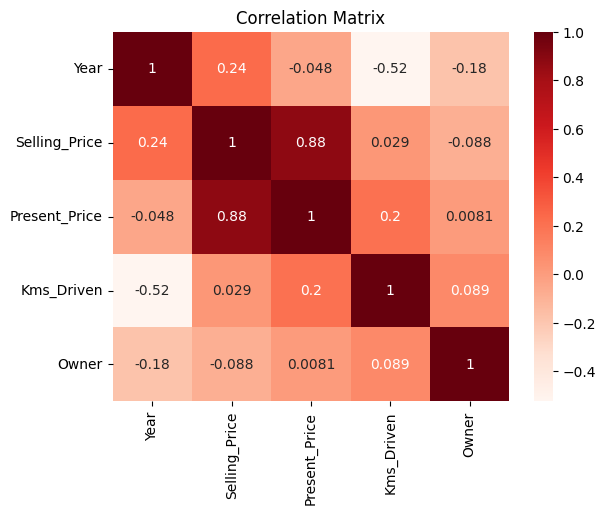

In [16]:
sns.heatmap(car_data.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Tek Özellik Kullanarak Doğrusal Regresyon

Korelasyon matrisinden, Mevcut Fiyat (Arabanın yeni alındığında ödenen fiyat) ile Satış Fiyatı arasında yüksek bir korelasyon değeri olduğunu gözlemleyebiliriz. Bu "Mevcut Fiyat" özelliğini, hedef çıktımız olan "Satış Fiyatı"nı tahmin etmek için kullanabiliriz.

In [17]:
fig = px.scatter(car_data, 
                 x='Present_Price',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

## Model

Amacımız, yukarıdaki 2D grafikte bu noktaları kullanarak bir doğru sığdırmaktır. Burada x özelliğimizi (Mevcut Fiyat) temsil ederken, amacımız y'yi (Satış Fiyatı) tahmin etmektir. ( y = a * x + b )

Amacımız, verilerimize en iyi uyan bir doğru elde etmek için a ve b parametrelerinin değerlerini bulmaktır. Bu, doğrusal regresyon kullanacağımız anlamına gelir. Input: Present Price, Targer: Selling Price.

Ilk Model:

In [18]:
def estimate_selling_price(present_price, a, b):
    return a * present_price + b

Test etmek için rastgele a ve b sayılar kullanalım.

In [19]:
a = 4
b = 50
estimate_selling_price(12.5,a,b)

100.0

Şimdi, setimizde mevcut olan her bir mevcut fiyat için satış fiyatı tahminlerini yapalım.

In [20]:
present_prices = car_data.Present_Price
present_prices

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [21]:
## Gerçek Selling Price'daki değerler
car_data.Selling_Price

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
# Tahmin
estimated_selling_prices = estimate_selling_price(present_prices, a, b)
estimated_selling_prices

0       72.36
1       88.16
2       89.40
3       66.60
4       77.48
        ...  
296     96.40
297     73.60
298     94.00
299    100.00
300     73.60
Name: Present_Price, Length: 301, dtype: float64

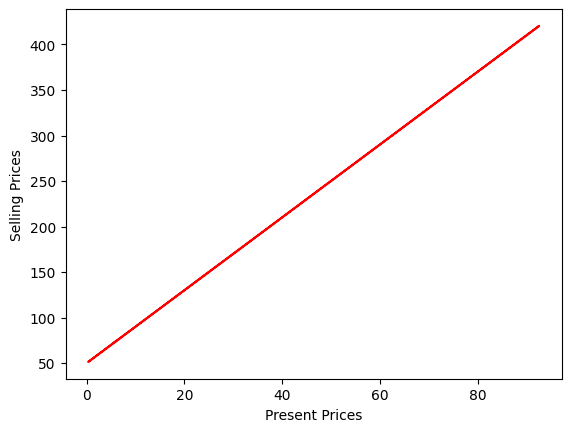

In [23]:
plt.plot(present_prices, estimated_selling_prices, 'r');
plt.xlabel('Present Prices');
plt.ylabel('Selling Prices');

Çizginin gerçekten de hedeften oldukça uzak olduğunu görebiliriz ve muhtemelen büyük hatalarla tahminler yapacaktır. Farklı a ve b değerleri girersek, farklı bir çizgi elde ederiz. Amacımız, verilere mümkün olduğunca yakın oturan bir çizgi bulmaktır, böylece yeni, görünmeyen bir arabanın mevcut fiyatını (x girdisi) aldığımızda, mevcut fiyatına dayanarak satış fiyatını (y çıktısı) tahmin edebiliriz.

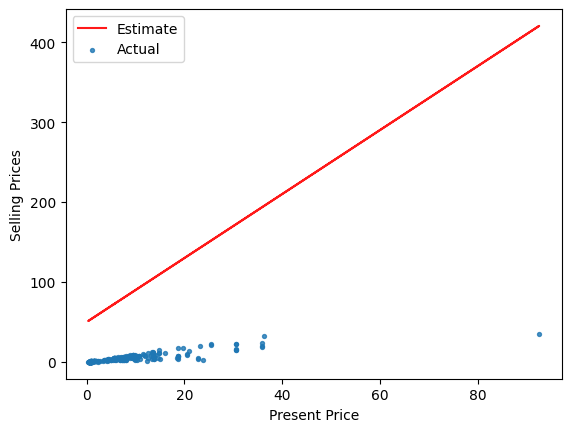

In [24]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9);

target = car_data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8);
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

## Cost Function

Cost Function olarak RMSE kullanıcağız

## Linear Regression (single-feature) using scikit-learn library

In [25]:
model = LinearRegression()

# Inputs
inputs = car_data[['Present_Price']]
targets = car_data.Selling_Price
model.fit(inputs,targets) # Modeli eğitmek. Bu yöntem verilere en iyi uyan çizgiyi bulacak ve hatayı en aza indirecektir.

LinearRegression()

Rastgele Değerlerle Tahmin:

In [26]:
import numpy as np
model.predict(np.array([[10.8], 
                        [12.5], 
                        [6.9]]))

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.30049697, 7.17914031, 4.28478576])

Gerçek veri ile: 

In [27]:
predictions = model.predict(inputs)
predictions

array([ 3.60771353,  5.64926719,  5.80949039,  2.86345093,  4.26928029,
        5.79915341,  4.91534157,  5.1685976 ,  5.31331532,  5.3288208 ,
        2.57918397,  6.08342038,  5.8560068 ,  4.70343347,  4.44500896,
        6.29532848,  6.29532848,  6.29532848,  3.34928902,  4.84298271,
        2.76008113,  3.66973542,  4.85848818,  2.50682511,  2.99783168,
        3.29760412,  3.75243126,  4.07287766,  2.76008113,  6.08342038,
        3.80928465,  3.24591921,  4.58972669,  5.86117529,  4.88433063,
        4.71893894,  4.43984047,  1.89694325,  2.66187981,  4.84298271,
        4.78612932,  2.7755866 ,  4.41399802,  4.88433063,  2.10885135,
        6.94138976,  3.24591921,  2.86345093,  4.70343347,  5.52005494,
       16.5392762 , 16.5392762 , 10.93663274, 16.5392762 ,  5.99555604,
        8.49193684,  4.4760199 , 10.30090844,  4.23310086, 19.3044185 ,
       10.33708787,  4.69826498, 19.3044185 , 19.3044185 , 19.44396773,
        4.31062821, 12.68358246, 11.28809008,  7.82003311, 11.52

In [28]:
targets

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

RMSE kullanarak bulunan en iyi a ve b değerlerinin hatasını hesaplayalım.

In [29]:
from sklearn.metrics import mean_squared_error as rmse
rmse(targets, predictions)

5.855089487051356

Tek bir özellik kullanarak yapılan tahminler, ortalama olarak 5.8 hata payına sahiptir.

In [30]:
# Slope
print(model.coef_)

# Intercept
print(model.intercept_)

[0.51684903]
0.7185274709817686


Şimdi en iyi uyumlu çizgiyi görselleştirelim.

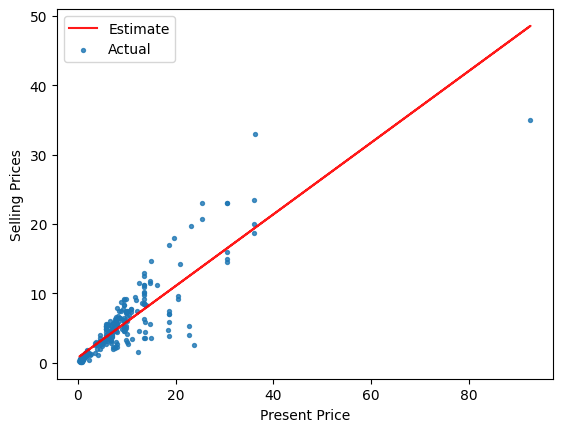

In [31]:
plt.plot(present_prices, predictions, 'r', alpha=0.9)
target = car_data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

Görüldüğü gibi, bu rastgele tahmin edilmiş sayılardan çok daha iyi bir modeldir. Bu nedenle, Mevcut Fiyat olarak girebileceğimiz diğer yeni görünmeyen giriş verileri için, bu modeli takip ederek Satış Fiyatı'nın bir yaklaşımını elde ederiz.

## Çoklu Özellikler Kullanarak Doğrusal Regresyon

Satış fiyatlarını tahmin etmek için birden fazla özelliği kullanacak şekilde modelimizi genişletmek için "Yıl" ve "Km_Driven" gibi özellikleri içerebiliriz ve modelimizin formülü şöyle olacaktır:

selling_prices = a1 * present_price + a2 * year + a3 * kms_driven

In [32]:
# Inputs ve Target
inputs = car_data[['Present_Price', 'Year','Kms_Driven']]
targets = car_data.Selling_Price

# Model
model = LinearRegression().fit(inputs, targets)

# Tahmin
predictions = model.predict(inputs)

# Modeli değerlenirmek
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 3.8595166657593194


Çoklu özelliklerin girdi olarak kullanıldığından kayıp değerinden gözlemleyebileceğimiz gibi, modelin performansı arttı ve hata 3.85'e düştü.

## Categorical Features

Veri setimizde Yakıt_Tipi, Satıcı_Tipi, Vites_Tipi gibi kategorik özellikler de bulunmaktadır.

İlk olarak, belirli bir kategorideki her bir değerin satış fiyatını nasıl etkilediğini gözlemlemek önemlidir, örneğin:

Yakıt tiplerine göre arabaların ortalama satış fiyatları.

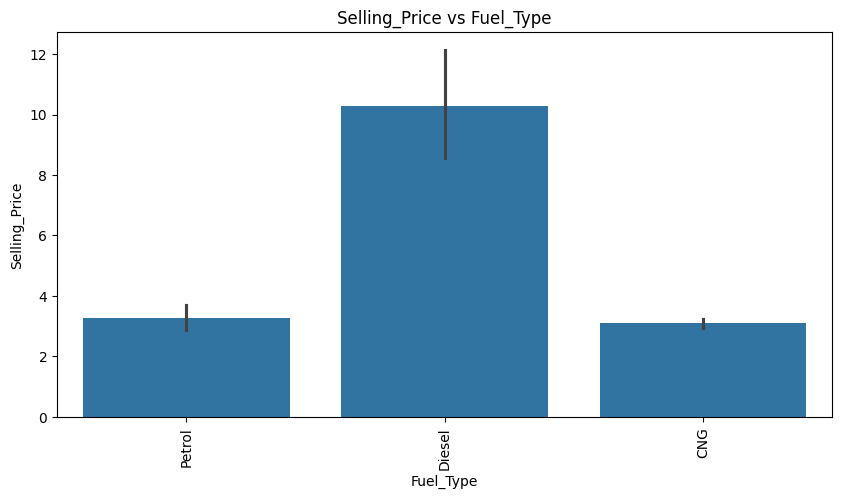

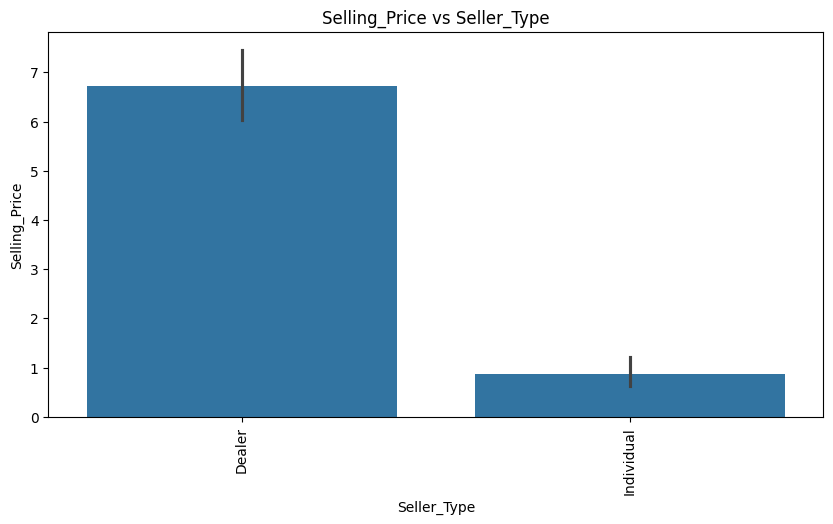

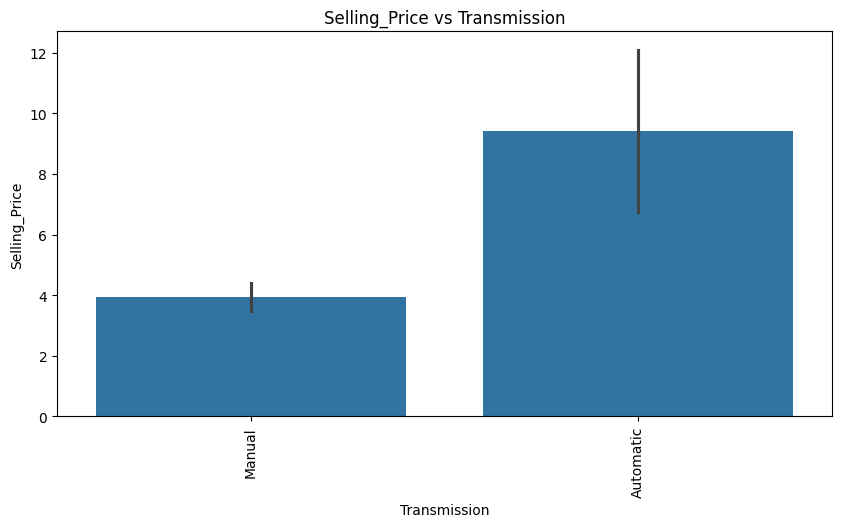

In [33]:
# Categorical columns
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))  
    sns.barplot(data=car_data, x=column, y='Selling_Price')
    plt.xticks(rotation=90) 
    plt.title(f'Selling_Price vs {column}')
    plt.show()

Gözlemler:

* Dizel yakıt tipine sahip arabalar daha pahalı görünüyor.
* Otomatik olan arabalar daha pahalı.
* Bireysel satıcılar tarafından satılan arabalar daha ucuz.

## One-Hot Encdoing - Kategorik Verileri Dönüştürme

In [34]:
car_data_copy = pd.get_dummies(car_data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)

In [35]:
car_data_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


Doğrusal Regresyon kullanarak modelimizi eğitmek için tüm özelliklerimizi kullanalım.

In [36]:
X = car_data_copy.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data_copy['Selling_Price']

Input'umuz

In [37]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,True,False,False,True
297,2015,5.90,60000,0,False,True,False,True
298,2009,11.00,87934,0,False,True,False,True
299,2017,12.50,9000,0,True,False,False,True


## Training, Validation and Test Sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Scaling The Features

In [39]:
Original_X_train_copy = pd.DataFrame(X_train, columns=X.columns)
Original_X_test_copy = pd.DataFrame(X_test, columns=X.columns)
y_train_copy = pd.DataFrame({'Selling_Price':y_train})
y_test_copy = pd.DataFrame({'Selling_Price':y_test})


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaled_X_train = pd.DataFrame(X_train, columns=X.columns)
Scaled_X_test = pd.DataFrame(X_test, columns=X.columns)

In [40]:
X_train

array([[-1.99046855, -0.76923237, -0.83904661, ...,  0.5       ,
         1.35566878, -2.85139173],
       [-0.24444351,  1.26268234,  0.43381798, ...,  0.5       ,
        -0.73764331,  0.35070593],
       [ 0.80317152,  0.38139709,  0.12793616, ..., -2.        ,
        -0.73764331,  0.35070593],
       ...,
       [ 0.1047615 , -0.44579392, -0.49554421, ...,  0.5       ,
         1.35566878,  0.35070593],
       [-0.94285352,  0.292367  ,  0.74767564, ...,  0.5       ,
        -0.73764331,  0.35070593],
       [ 1.15237653, -0.63399678, -0.78963873, ...,  0.5       ,
         1.35566878,  0.35070593]])

## Training the model

MAE:  1.2401911938820376
MSE:  3.4868775495557136
MSE on training data:  2.876321078059325
R2 score:  0.850413419632344


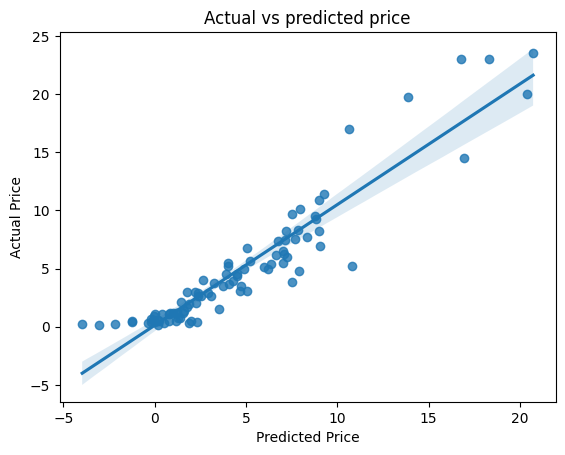

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

Hatadan görebileceğimiz gibi, eğitim verilerinde hata 2.87'ye düştü ve görünmeyen verilerde 3.48'e düştü, bu da iyi bir değerdir, tahminlerimiz ortalama olarak 3.48 yanlıştır.

In [42]:
import random

In [43]:
random_data = pd.DataFrame(columns=X.columns)
print(random_data)
random_data_scaled  = []
random_data_prediction = []

Empty DataFrame
Columns: [Year, Present_Price, Kms_Driven, Owner, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, Transmission_Manual]
Index: []


### Random Data Generator

Rastgele veriler oluşturmak için bir random fonksiyonu tasarladık. Bu kodu kullanarak uygulamamız için rastgele veri girişleri yapabiliyoruz.

In [44]:
def create_random_data():
    s1=X_train[1:2]
    col_names= X.columns
    s1_df = pd.DataFrame(s1, columns=col_names)
    col_names = col_names.drop(["Fuel_Type_Petrol","Fuel_Type_Diesel"])
    for c in col_names:
        s=np.random.choice(X[c])
        s1_df[c]=s
    ftp = random.randint(0, 1)
    s1_df["Fuel_Type_Petrol"] = bool(ftp)
    s1_df["Fuel_Type_Diesel"] = not ftp
    return s1_df

In [45]:
for i in range (0, 100):
    random_data_sample = create_random_data()
    random_data = pd.concat([random_data, random_data_sample])
    random_data_numeric = random_data_sample.astype(float)
    scaled = scaler.transform(random_data_numeric)
    random_data_scaled.append(scaled)
    result = model.predict(scaled)
    random_data_prediction.append(result)
    print(result)

[1.42664945]
[3.51546927]
[2.62529002]
[2.56694602]
[3.54452791]
[3.12016312]
[6.14171794]
[-1.34113725]
[1.41316786]
[12.90855253]
[0.97798371]


C:\Users\USER\AppData\Local\Temp\ipykernel_3048\3200204354.py:3: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



[0.86254329]
[14.13566016]
[3.14880376]
[3.59211397]
[3.42857435]
[2.23795128]
[8.37629392]
[6.3281185]
[6.91535502]
[3.71002785]
[15.31102159]
[6.04118905]
[4.58199781]
[6.37103832]
[6.00735471]
[4.93012128]
[0.15345857]
[9.60978784]
[8.8984378]
[6.70900155]
[7.69876653]
[0.59062956]
[3.38759814]
[5.64460236]
[13.88670082]
[4.51674226]
[2.76815171]
[1.80527243]
[8.00685244]
[2.22006075]
[5.05557067]
[6.04275658]
[1.11045737]
[5.62968217]
[3.10182955]
[6.81508367]
[5.59106158]
[3.47996129]
[4.95016194]
[9.66275738]
[2.72131706]
[0.28734816]
[17.02132971]
[0.35765597]
[6.85524043]
[9.90828956]
[4.04767399]
[5.3199684]
[-0.61832492]
[1.94883467]
[1.63935086]
[4.59499247]
[5.56825068]
[5.9666479]
[5.48244259]
[6.28419403]
[8.64948022]
[4.44694402]
[2.53526403]
[4.30144409]
[1.23373721]
[4.57103234]
[2.54734146]
[5.13997806]
[3.28739293]
[5.58279803]
[3.90387557]
[7.39638815]
[3.1533448]
[3.88070186]
[3.31198715]
[0.22805812]
[5.3951969]
[5.70543748]
[1.45296641]
[4.48379454]
[2.51174597]


Sonuçlarımızdan memnun olduğumuza göre, onları Entity Framework Core ve DevExpress kullanarak sunmak için veritabanına kaydetme zamanı geldi.

## Database'ye veri aktarması

### Gerekli olan kütüphaneyi yükle: 

In [46]:
import pyodbc
from uuid import uuid4

### Server'e bağlanması

In [47]:
server = 'DESKTOP-ALSQEP4' 
database = 'IVYTS_Final_Proje' 
username = 'sa' 
password = 'IVYTSProjeKodu' 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

### Orijinal Data'yı aktar: 

In [48]:
cursor.execute("TRUNCATE TABLE OriginalCarData") # tabloyu eski verilerden temizle
# Insert Dataframe into SQL Server:
for index, row in car_data.iterrows():
     cursor.execute("INSERT INTO dbo.OriginalCarData values(?,?,?,?,?,?,?,?,?,?)", uuid4(), row.Car_Name, row.Year, row.Selling_Price, row.Present_Price, row.Kms_Driven, row.Fuel_Type, row.Seller_Type, row.Transmission, row.Owner)

### Numeric halini kaydet: 

In [49]:
cursor.execute("TRUNCATE TABLE OneHotEncodedCarData") # tabloyu eski verilerden temizle
for index, row in car_data_copy.iterrows():
     cursor.execute("INSERT INTO dbo.OneHotEncodedCarData values(?,?,?,?,?,?,?,?,?,?,?)", uuid4(),  row.Car_Name, row.Year, row.Selling_Price, row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

### X Tabloların Doldurması

#### X Test tablosu

Rastgele seçilmiş olan X Test verilerin kaydet:

In [50]:
cursor.execute("TRUNCATE TABLE X_Test") # tabloyu eski verilerden temizle
for index, row in Original_X_test_copy.iterrows():
     cursor.execute("INSERT INTO dbo.X_Test values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

Scaled down X Test verileri kaydet: 

In [51]:
cursor.execute("TRUNCATE TABLE X_Test_Scaled") # tabloyu eski verilerden temizle
for index, row in Scaled_X_test.iterrows():
     cursor.execute("INSERT INTO dbo.X_Test_Scaled values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

#### X Train tablosu

X Train verileri kaydet: 

In [52]:
cursor.execute("TRUNCATE TABLE X_Train") # tabloyu eski verilerden temizle
for index, row in Original_X_train_copy.iterrows():
     cursor.execute("INSERT INTO dbo.X_Train values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

Scaled down X Train verileri kaydet: 

In [53]:
cursor.execute("TRUNCATE TABLE X_Train_Scaled") # tabloyu eski verilerden temizle
for index, row in Scaled_X_train.iterrows():
     cursor.execute("INSERT INTO dbo.X_Train_Scaled values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

### Y Tabloların Doldurması

#### Y Test tablosu: 

In [54]:
cursor.execute("TRUNCATE TABLE Y_Test") # tabloyu eski verilerden temizle
for index, row in y_test_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Y_Test values(?,?)", uuid4(), row.Selling_Price)

#### Y Train tablosu: 

In [55]:
cursor.execute("TRUNCATE TABLE Y_Train") # tabloyu eski verilerden temizle
for index, row in y_train_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Y_Train values(?,?)", uuid4(), row.Selling_Price)

### Tahmin Tabloları doldurması

In [56]:
pred_copy = pd.DataFrame({'Selling_Price':pred})
pred_train_copy = pd.DataFrame({'Selling_Price':pred_train})

Test Prediction: 

In [57]:
cursor.execute("TRUNCATE TABLE Test_Prediction") # tabloyu eski verilerden temizle
for index, row in pred_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Test_Prediction values(?,?)", uuid4(), row.Selling_Price)

Trained Prediction:

In [58]:
cursor.execute("TRUNCATE TABLE Trained_Prediction") # tabloyu eski verilerden temizle
for index, row in pred_train_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Trained_Prediction values(?,?)", uuid4(), row.Selling_Price)

### Random Data

#### Random Data Not Scaled

In [59]:
cursor.execute("TRUNCATE TABLE Random_Data") # tabloyu eski verilerden temizle
for index, row in random_data.iterrows():
     cursor.execute("INSERT INTO dbo.Random_Data values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

#### Scaled Random Data

In [60]:
random_data_scaled_reshape = np.squeeze(random_data_scaled, axis=1)
random_data_scaled_copy = pd.DataFrame(random_data_scaled_reshape, columns=X.columns)
cursor.execute("TRUNCATE TABLE Random_Data_Scaled") # tabloyu eski verilerden temizle
for index, row in random_data_scaled_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Random_Data_Scaled values(?,?,?,?,?,?,?,?,?)", uuid4(), row.Year,  row.Present_Price, row.Kms_Driven, row.Owner,  row.Fuel_Type_Diesel, row.Fuel_Type_Petrol, row.Seller_Type_Individual, row.Transmission_Manual)

#### Random Data Prediction

In [61]:
random_data_prediction_reshape = np.squeeze(random_data_prediction, axis=1)
random_data_prediction_copy = pd.DataFrame({'Selling_Price':random_data_prediction_reshape})
print(random_data_prediction_reshape)
cursor.execute("TRUNCATE TABLE Random_Data_Prediction") # tabloyu eski verilerden temizle
for index, row in random_data_prediction_copy.iterrows():
     cursor.execute("INSERT INTO dbo.Random_Data_Prediction values(?,?)", uuid4(), row.Selling_Price)

[ 1.42664945e+00  3.51546927e+00  2.62529002e+00  2.56694602e+00
  3.54452791e+00  3.12016312e+00  6.14171794e+00 -1.34113725e+00
  1.41316786e+00  1.29085525e+01  9.77983706e-01  8.62543293e-01
  1.41356602e+01  3.14880376e+00  3.59211397e+00  3.42857435e+00
  2.23795128e+00  8.37629392e+00  6.32811850e+00  6.91535502e+00
  3.71002785e+00  1.53110216e+01  6.04118905e+00  4.58199781e+00
  6.37103832e+00  6.00735471e+00  4.93012128e+00  1.53458571e-01
  9.60978784e+00  8.89843780e+00  6.70900155e+00  7.69876653e+00
  5.90629557e-01  3.38759814e+00  5.64460236e+00  1.38867008e+01
  4.51674226e+00  2.76815171e+00  1.80527243e+00  8.00685244e+00
  2.22006075e+00  5.05557067e+00  6.04275658e+00  1.11045737e+00
  5.62968217e+00  3.10182955e+00  6.81508367e+00  5.59106158e+00
  3.47996129e+00  4.95016194e+00  9.66275738e+00  2.72131706e+00
  2.87348163e-01  1.70213297e+01  3.57655967e-01  6.85524043e+00
  9.90828956e+00  4.04767399e+00  5.31996840e+00 -6.18324917e-01
  1.94883467e+00  1.63935

### Değişikleri kaydet ve bitir:

In [62]:
cnxn.commit()
cursor.close()